In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import seaborn as sns
sns.set()

In [11]:
website_file_path = '/Users/gandalf/Documents/coding/rczyrnik.github.io/capstone/'

In [135]:
df =  pd.read_pickle('/Users/gandalf/Documents/coding/data_do_not_commit/convo_df.pkl')
n=len(df)
df.head(2)

,first_message_uid,second_message_uid,len_convo,first_message_read,first_message_timestamp,first_message_text,first_message_len,first_message_year,first_message_day_of_year,first_message_month,first_message_day_of_month,first_message_week,first_message_day_of_week,first_message_day,first_message_hour,const
02sjTzcsaO02omVxM8Xm,02omVxM8Xm,02sjTzcsaO,1,False,2017-09-11 02:41:19.188,Wya?,4,2017,254,9,11,37,1,736583,2,1
07lVtClAEQ01iDVeaXl1,01iDVeaXl1,07lVtClAEQ,1,False,2017-09-06 20:03:30.419,Hey I'm looking for some roommates too have yo...,62,2017,249,9,6,36,3,736578,20,1


# TIME

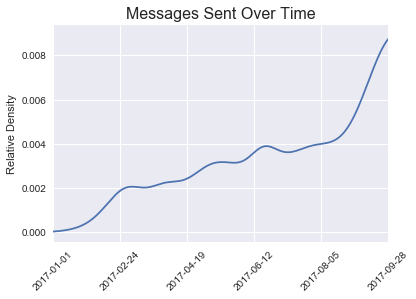

In [81]:
ax = df['first_message_day_of_year'].plot(kind='kde')

xlabels = [dt.date(2017,1,1) + dt.timedelta(x) for x in range(0, 360, 54)]
ax.set_xticklabels(xlabels)

plt.xticks(rotation=45)

ax.set_xlim(0,250)
ax.set_ylabel("Relative Density")
ax.set_xlabel("")
plt.title("Messages Sent Over Time", fontsize=16)
# plt.savefig(website_file_path+"eda_dates_of_messages.png")
plt.show()

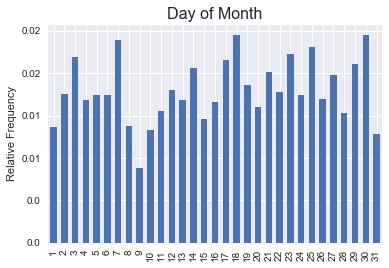

In [83]:
temp = df.groupby("first_message_day_of_month").count().first_message_timestamp
ax = temp.plot(kind='bar',width=.6)

y_ticks = ax.get_yticks()
ylabels = [round(x/n,2) for x in y_ticks]
ax.set_yticklabels(ylabels)

ax.set_ylabel("Relative Frequency")
ax.set_xlabel("")
plt.title("Day of Month", fontsize=16)
# plt.savefig(website_file_path+"eda_day_of_month.png")
plt.show()

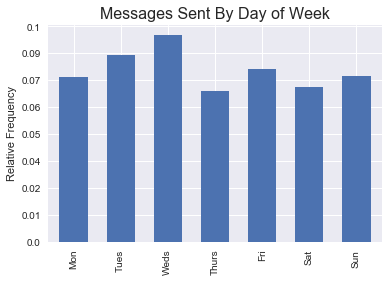

In [85]:
temp = df.groupby("first_message_day_of_week").count().first_message_timestamp
ax = temp.plot(kind='bar',width=.6)
x_labels = ["Mon","Tues","Weds","Thurs","Fri","Sat","Sun"]
ax.set_xticklabels(x_labels)

y_ticks = ax.get_yticks()

ylabels = [round(x/n,2) for x in y_ticks]
ax.set_yticklabels(ylabels)

ax.set_ylabel("Relative Frequency")
ax.set_xlabel("")
plt.title("Messages Sent By Day of Week", fontsize=16)
# plt.savefig(website_file_path+"eda_message_day_of_week.png")
plt.show()

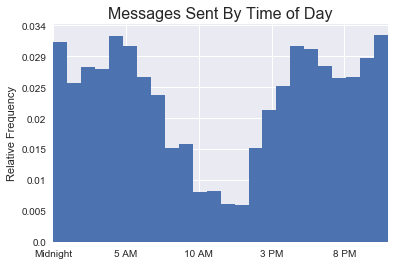

In [86]:
ax = df['first_message_hour'].plot(kind='hist',bins=24)
x_labels = ["Midnight", "5 AM", "10 AM", "3 PM","8 PM"]
ax.set_xticklabels(x_labels)
ax.set_xlim(0,23)

y_ticks = ax.get_yticks()


ylabels = [round(x/n,3) for x in y_ticks]
ax.set_yticklabels(ylabels)

ax.set_ylabel("Relative Frequency")
ax.set_xlabel("")
plt.title("Messages Sent By Time of Day", fontsize=16)
# plt.savefig(website_file_path+"eda_message_time_of_day.png")
plt.show()

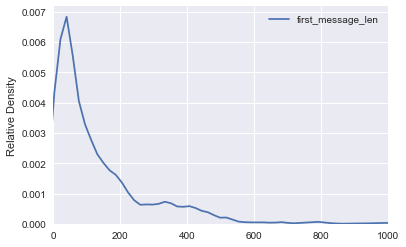

0.157% of messages are longer than 1000.


In [103]:
maxim = 1000
ax=sns.kdeplot(df.first_message_len)

ax.set_ylabel("Relative Density")
ax.set_xlabel("")
ax.set_xlim(0,maxim)
plt.savefig(website_file_path+"eda_len_of_messages.png")
plt.show()

print("{:.3}% of messages are longer than {}.".format(100*(df.first_message_len>1000).sum()/n, maxim))

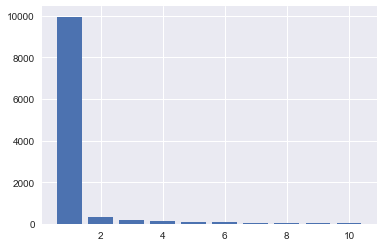

5.92% of messages get a response.
1.19% of messages are longer than 10.


In [134]:
maxim = 10
temp = df.groupby('len_convo').count().const
temp = temp[:maxim]
ax = plt.bar(temp.index, temp)

plt.savefig(website_file_path+"eda_len_of_conversations.png")
plt.show()
print("{:.3}% of messages get a response.".format(100*(df.len_convo>1).sum()/n, maxim))
print("{:.3}% of messages are longer than {}.".format(100*(df.len_convo>maxim).sum()/n, maxim))